In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/shikharghimire/Desktop/TimeSeries-Practice/data/macrodata.csv',index_col = 0,parse_dates=True)

In [3]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


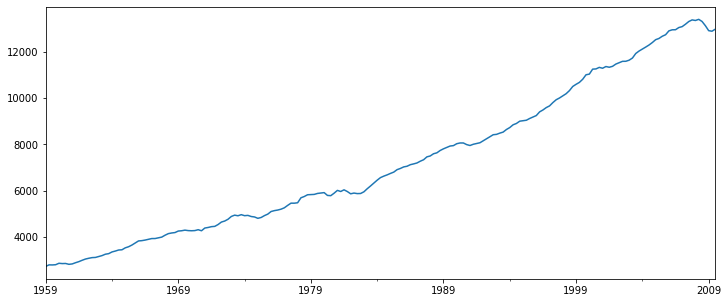

In [4]:
df['realgdp'].plot(figsize = (12,5))

In [5]:
#Herdrick prescott filter will seperate out time series into a trend and cyclical components
from statsmodels.tsa.filters.hp_filter import hpfilter 

In [7]:
gdp_cycle,gdp_trend = hpfilter(df['realgdp'],lamb=1600) #lambda as 1600 because it has quaterly data. hpfilter returns tuple
#so we will have two variables to store the tuples

In [8]:
type(gdp_trend) #These are series values

pandas.core.series.Series

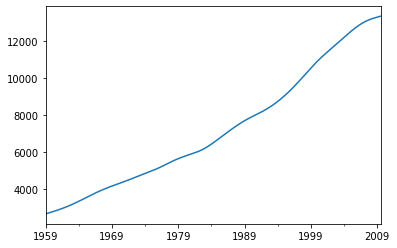

In [9]:
gdp_trend.plot()

In [10]:
#We can also plot gdp_cycle and gdp trend on top of each otther
df['trend'] = gdp_trend

In [11]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33,13222.581545
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91,13249.189472
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71,13274.457706
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19,13299.061073


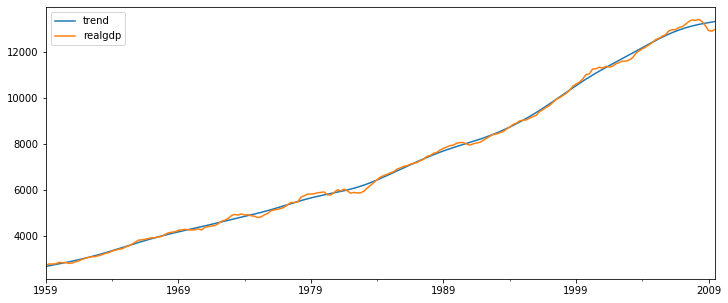

In [12]:
df[['trend','realgdp']].plot(figsize = (12,5))
#Blue represents the trend. 
#orange represents the real gdp

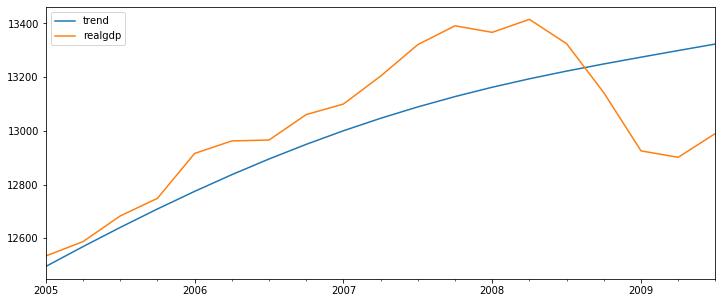

In [13]:
#If we want to zoom in on certain periods(dates),we can simply
df[['trend','realgdp']]['2005-01-01':].plot(figsize = (12,5)) #Getting anything after 2005

In [ ]:
#Here we can see the real gdp in orange. It began to trend upwards but  then the great recession hit in 2008

In [14]:
#The main goal of this section is to get comfortable with statsmodels